# Superdense Coding

A procedure that allows a person to send two classical bits to another party using just one qubit.

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram

## Simulation

In [2]:
def create_bell_pair(qc, a, b):
    """
    Creates an entangled pair of qubits (also called Bell pair)
    """
    qc.h(a)
    qc.cx(a,b)
    qc.barrier()

def encode_message(qc, qubit, msg):
    """
    Alice encodes the two classical bits
    """
    if msg == "00":
        pass    # To send 00 we do nothing
    elif msg == "10":
        qc.x(qubit) # To send 10 we apply an X-gate
    elif msg == "01":
        qc.z(qubit) # To send 01 we apply a Z-gate
    elif msg == "11":
        qc.z(qubit) # To send 11, we apply a Z-gate
        qc.x(qubit) # followed by an X-gate
    else:
        print("Invalid Message: Sending '00'")

def decode_message(qc, a, b):
    """
    Bob decodes the quantum bits
    """
    qc.cx(a,b)
    qc.h(a)

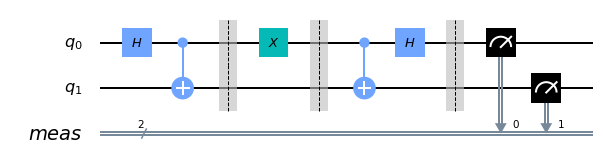

In [4]:
qc = QuantumCircuit(2)


# First, Charlie creates the entangled pair between Alice and Bob
create_bell_pair(qc, 0, 1)

# At this point, qubit 0 goes to Alice and qubit 1 goes to Bob

# Next, Alice encodes her message onto qubit 0.
message = "10"
encode_message(qc, 0, message)
qc.barrier()

# Alice then sends her qubit to Bob.
# After recieving qubit 0, Bob applies the recovery protocol:
decode_message(qc, 0, 1)

# Finally, Bob measures his qubits to read Alice's message
qc.measure_all()

# Draw our output
qc.draw(output = "mpl")

{'10': 1024}


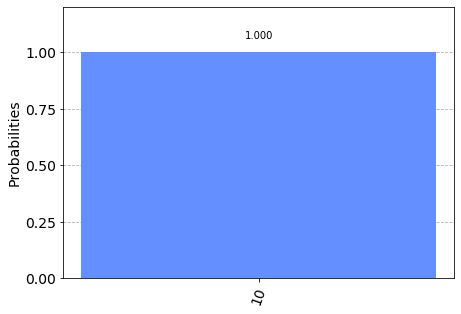

In [5]:
simulator = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend=simulator, shots=1024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

## On real quantum computer

In [6]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 256

IBMQ.load_account()

# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))

print("least busy backend: ", backend)
# Run our circuit
job = execute(qc, backend=backend, shots=shots)

least busy backend:  ibmq_london


In [7]:
# Monitoring our job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


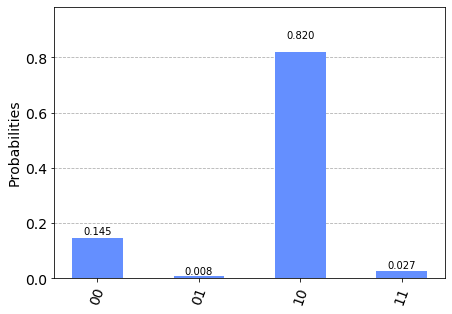

In [8]:
# Plotting our result
result = job.result()
plot_histogram(result.get_counts(qc))

In [9]:
correct_results = result.get_counts(qc)[message]
accuracy = (correct_results/shots)*100
print("Accuracy = %.2f%%" % accuracy)

Accuracy = 82.03%
